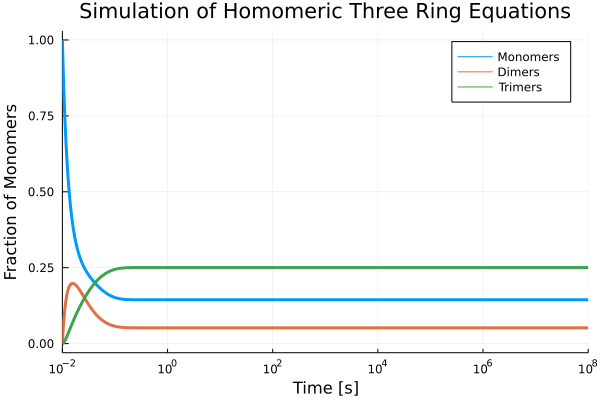

In [1]:
#time course
using DifferentialEquations
α=150
β=60
γ=1.5
function ring3mem!(dx,x,p,t)
 dx[1] = 2*β*x[2]-2*α*(x[1])^2-α*x[1]*x[2]+3*γ*x[3]
 dx[2] = α*(x[1])^2-β*x[2]-α*x[2]*x[1]+3*γ*x[3]
 dx[3] = α*x[1]*x[2]-3*γ*x[3]
end
#the equation
x0 = [1.0;0.0;0.0]
tspan = (0.01,10.0^8)
prob = ODEProblem(ring3mem!,x0,tspan)
sol = solve(prob)

using Plots
plot(sol,linewidth=3,title="Simulation of Homomeric Three Ring Equations",
     xaxis=:log, yaxis="Fraction of Monomers", xlabel="Time [s]", label=["Monomers" "Dimers" "Trimers"])

In [2]:
print(length(sol[1,:]))# this is all vallues of monomers

56

In [8]:
#Assembly Yeild--> turn into a function eventually
vlength=length(sol[1,:])
YM=[]
for i in range(1, vlength, step=1)
    a=1*(sol[1,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
    append!(YM,a)
end

YD=[]
for i in range(1, vlength, step=1)
    b=2*(sol[2,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
    append!(YD,b)
end

YT=[]
for i in range(1, vlength, step=1)
    c=3*(sol[3,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
    append!(YT,c)
end

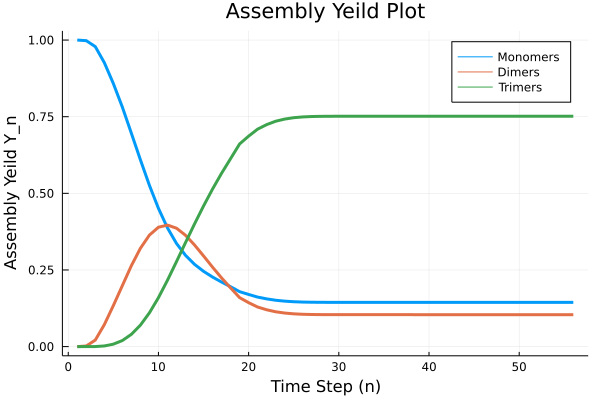

In [9]:
using Plots
plot(YM, linewidth=3,title="Assembly Yeild Plot",
     xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Monomers")
plot!(YD, linewidth=3,title="Assembly Yeild Plot",
     xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Dimers")
plot!(YT, linewidth=3,title="Assembly Yeild Plot",
     xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Trimers")

In [6]:
# write a function that takes in the assembly yeild and output the characteristic time (Y_n(t*)=0.90)
#functions in julia, how to define functions
#https://docs.julialang.org/en/v1/manual/functions/
#https://docs.julialang.org/en/v1/manual/functions/

In [16]:
#Characteristic time
percentval=0.6
for i in range(1, vlength, step=1)
    c=3*(sol[3,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
    if (percentval-c)<0.01
        print(i)
        break
    end
end

18

In [20]:
#Assembly Function
using Plots
function assembly_yeild3(sol)#this function only works for the three ring model
    vlength=length(sol[1,:])
    YM=[]
    for i in range(1, vlength, step=1)
        a=1*(sol[1,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))# I can think of a way to iterate the value being summed, but not the for loops
        append!(YM,a)
    end

    YD=[]
    for i in range(1, vlength, step=1)
        b=2*(sol[2,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
        append!(YD,b)
    end

    YT=[]
    for i in range(1, vlength, step=1)
        c=3*(sol[3,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
        append!(YT,c)
    end
    plot(YM, linewidth=3,title="Assembly Yeild Plot",
         xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Monomers")
    plot!(YD, linewidth=3,title="Assembly Yeild Plot",
         xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Dimers")
    plot!(YT, linewidth=3,title="Assembly Yeild Plot",
         xaxis=:"Time Step (n)", yaxis="Assembly Yeild Y_n", label="Trimers")
end

assembly_yeild3 (generic function with 1 method)

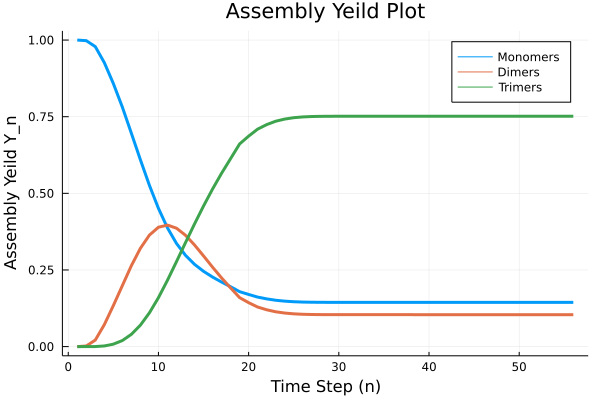

In [21]:
assembly_yeild3(sol)

In [28]:
#Characteristic Time Plot
function character_t(percentval,accuracy,sol)
    for i in range(1, vlength, step=1)
        c=3*(sol[3,i])/(sum(sol[1,i]+2*sol[2,i]+3*sol[3,i]))
        if (percentval-c)<accuracy
            print(i)
            break
        end
    end
end

character_t (generic function with 1 method)

In [29]:
character_t(0.6,0.01,sol)

18

In [30]:
character_t(0.7,0.001,sol)

21

In [31]:
character_t(0.6,0.0001,sol)

18

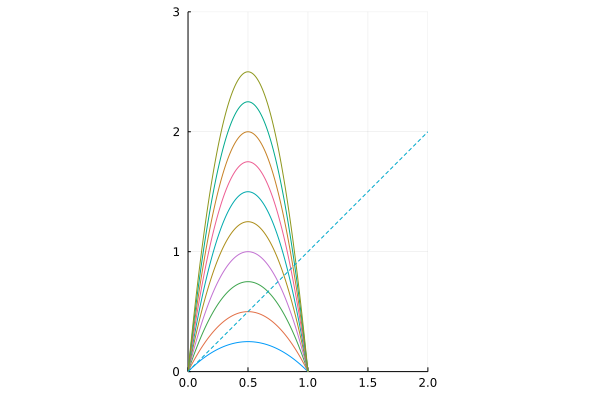

In [5]:
using Plots, LaTeXStrings

g(x, a) = a * x * (1 - x);

fig = plot(ratio=1, xlims=(0, 2), ylims=(0, 3)); # produces an empty plot
    
for a in (range(1,10, step=1))
    plot!(fig, 0:0.01:1, x -> g(x, a), label=false) #, label=L"a = %$a") # the loop fills in the plot with this
end

plot!(x -> x, ls=:dash, lab=false)

fig
#The label is using the LaTeXStrings functionality.
#fig at the end displays the fig object that plot! adds to.